In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Dataset

df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
# Create a new column representing the number of words in text 

df['length'] = df.apply(lambda x: len(x['text']), axis=1)

# EDA

<AxesSubplot:xlabel='stars', ylabel='length'>

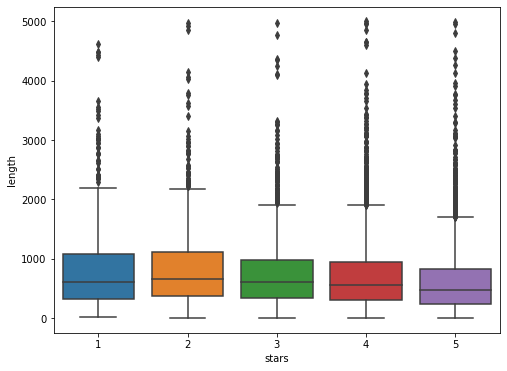

In [6]:
# Boxplot

plt.figure(figsize=(8,6))
sns.boxplot(x='stars',y='length',data=df)

Text(0.5, 1.0, 'Total count for each star')

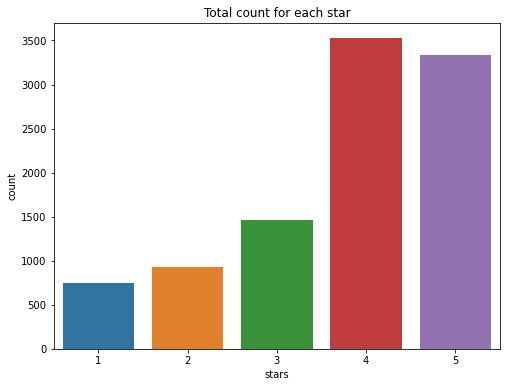

In [7]:
# Histogram

plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=df)
plt.title('Total count for each star')

<AxesSubplot:>

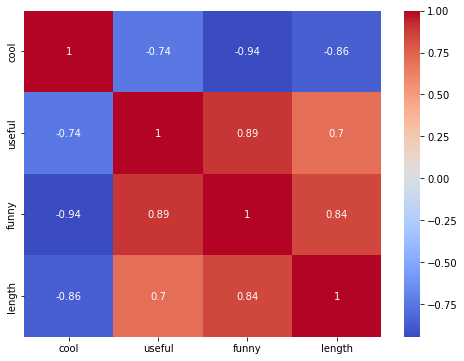

In [9]:
# Correlation Heatmap

stars = df.groupby('stars').mean()
plt.figure(figsize=(8,6))
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

In [10]:
# only keep the very low and high ratings to save memory

df = df[(df['stars']==1)|(df['stars']==5)]

In [11]:
# Remove texts that are not English 

from langdetect import detect_langs

language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [12]:
df['language'].unique()

array(['en', 'sl', 'de', 'ca', 'no', 'nl', 'cy', 'id', 'af', 'da', 'fr',
       'it', 'tl', 'pt', 'tr'], dtype=object)

After checking, the texts above are actually in English so we just keep all of them.

In [13]:
# Stopwords Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

my_stop_words = set(stopwords.words('english') + ['super', 'duper', 'place'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# BOW Tokenization

from nltk.tokenize import word_tokenize
from nltk import FreqDist

full_text = ' '.join(df['text'])
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

In [16]:
# Word Stemming

from nltk.stem import PorterStemmer

porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

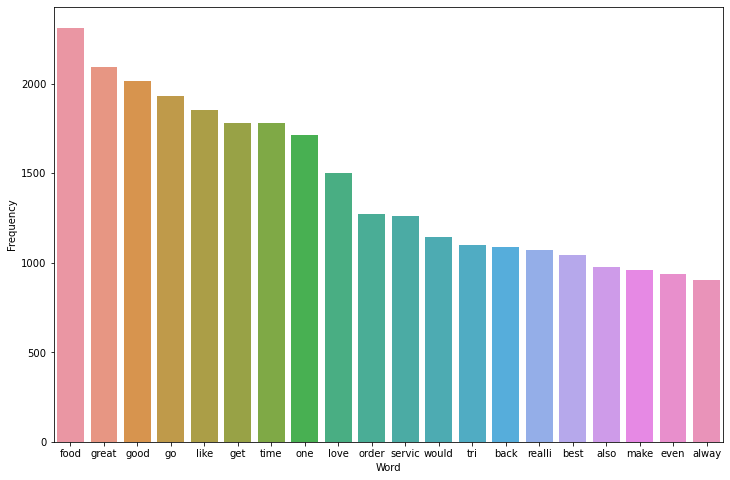

In [24]:
# Visualize the word frequency 

plt.figure(figsize=(12,8))
sns.barplot(x='Word',y='Frequency',data=stemmed_dist)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(df['text'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(15)

D:\Anaconda\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
bigram_frequency

,bigram,frequency
70033,go back,183
76791,happy hour,173
60776,first time,165
82300,ice cream,149
78852,highly recommend,144
39312,customer service,143
73621,great food,135
131141,really good,120
73973,great service,107
53851,every time,106


<AxesSubplot:xlabel='bigram', ylabel='frequency'>

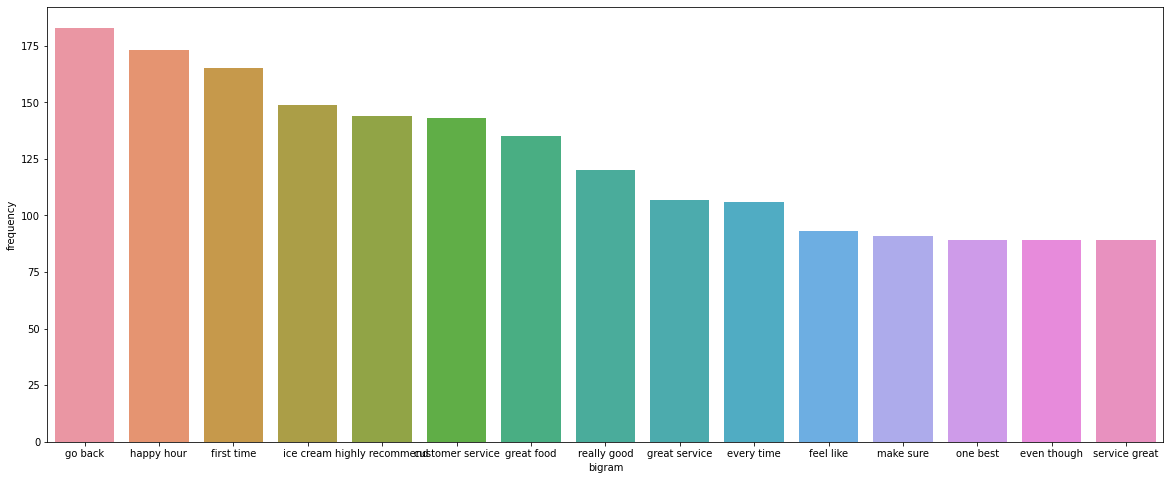

In [27]:
# Visualize the bi-gram frequency 

plt.figure(figsize=(20,8))
sns.barplot(x='bigram',y='frequency',data=bigram_frequency)

In [28]:
from nltk.tokenize import sent_tokenize
import re
from gensim.models import Word2Vec

df_good = df[df['stars']==5]
good_reviews = ' '.join(df_good['text'])
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])
    
model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('friendly', 0.06613236),
 ('service', 0.031037549),
 ('staff', 0.027906872),
 ('food', 0.008173943),
 ('great', 0.006486457),
 ('always', 0.005337768),
 ('excellent', 0.0028103322),
 ('nice', 0.002485616),
 ('atmosphere', 0.0023855283),
 ('prices', 0.0021241119)]

In [29]:
!pip install datareader

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

X = df['text']
y = df['stars']

vect = CountVectorizer(stop_words=my_stop_words)
X = vect.fit_transform(X)

In [61]:
X

<4086x19038 sparse matrix of type '<class 'numpy.int64'>'
	with 211150 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
# Initialize MultinomialNB

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [54]:
nb.fit(X_train,y_train)

MultinomialNB()

In [55]:
predictions = nb.predict(X_test)

In [56]:
# Model Evaluation

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[170  78]
 [ 28 950]]


              precision    recall  f1-score   support

           1       0.86      0.69      0.76       248
           5       0.92      0.97      0.95       978

    accuracy                           0.91      1226
   macro avg       0.89      0.83      0.85      1226
weighted avg       0.91      0.91      0.91      1226



In [60]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
prediction = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 37 188]
 [161 840]]


              precision    recall  f1-score   support

           1       0.19      0.16      0.17       225
           5       0.82      0.84      0.83      1001

    accuracy                           0.72      1226
   macro avg       0.50      0.50      0.50      1226
weighted avg       0.70      0.72      0.71      1226



In [ ]:
# Use Text Processing with TF-IDF

